In [110]:
dir = "/Users/jgabor/NEW_WORKDIR/INSIGHT/DATA/"
file = dir + "ticks.csv"
import matplotlib
%matplotlib inline

In [5]:
import pandas as pd

In [118]:
tickdat = pd.read_csv(file, parse_dates=True)
tickdat.head()

,date,lat,long,location
0,2005-12-22,44.4578,-103.8589,All Locations : Spearfish Canyon : Bridalveil ...
1,2004-01-29,44.4578,-103.8589,All Locations : Spearfish Canyon : Bridalveil ...
2,2014-12-28,44.4578,-103.8589,All Locations : Spearfish Canyon : Bridalveil ...
3,1994-12-03,44.4578,-103.8589,All Locations : Spearfish Canyon : Bridalveil ...
4,2009-01-01,44.4578,-103.8589,All Locations : Spearfish Canyon : Bridalveil ...


In [119]:
tickdat.columns

Index([u'date', u'lat', u'long', u'location'], dtype='object')

In [120]:
tickdat = tickdat.sort_index()
tickdat.head()

,date,lat,long,location
0,2005-12-22,44.4578,-103.8589,All Locations : Spearfish Canyon : Bridalveil ...
1,2004-01-29,44.4578,-103.8589,All Locations : Spearfish Canyon : Bridalveil ...
2,2014-12-28,44.4578,-103.8589,All Locations : Spearfish Canyon : Bridalveil ...
3,1994-12-03,44.4578,-103.8589,All Locations : Spearfish Canyon : Bridalveil ...
4,2009-01-01,44.4578,-103.8589,All Locations : Spearfish Canyon : Bridalveil ...


In [121]:
td = tickdat.sort_values(by=['location','date'])


In [122]:
(re.search('Joshua', "The Joshua tree nationa park"))

##td['location'].str.findall('*Joshua*')

In [123]:
w_Jtree = td['location'].str.contains("Joshua Tree")
JJ = td[w_Jtree]

In [124]:
print JJ.head()
print len(JJ)

               date      lat      long  \
1178803  2011-09-29  34.1194 -116.1185   
1198453  2012-06-23  34.1181 -116.1157   
76578    0000-00-00  34.0285 -116.1451   
76621    1984-03-16  34.0285 -116.1451   
76577    2004-03-06  34.0285 -116.1451   

                                                  location  
1178803  All Locations : Joshua Tree National Park : *J...  
1198453  All Locations : Joshua Tree National Park : *J...  
76578    All Locations : Joshua Tree National Park : *J...  
76621    All Locations : Joshua Tree National Park : *J...  
76577    All Locations : Joshua Tree National Park : *J...  
60923


In [125]:
loc = td['location']

In [126]:
ss = loc.str.split(":")

In [127]:
ss[55000]

['All Locations ',
 ' Joshua Tree National Park ',
 ' Real Hidden Valley ',
 ' The Sentinel ',
 ' The Sentinel - West Face']

In [128]:
maxlen = 0
minlen = 100
for mylist in ss:
    if len(mylist) > maxlen:
        maxlen = len(mylist)
        print "****", mylist
    if len(mylist) < minlen:
        minlen = len(mylist)
        print '----', mylist
print minlen, maxlen

**** ['All Locations ', ' * In Progress ', " Fireman's Park Bouldering A... ", ' Burn Ban Boulder']
---- ['All Locations ', ' * In Progress ', " Fireman's Park Bouldering A... ", ' Burn Ban Boulder']
**** ['All Locations ', ' * In Progress ', ' North Dakota ', ' Sentinel Butte Bouldering ', ' North Boulders ', ' The Spire']
---- ['All Locations ', ' * In Progress ', ' Phantom Canyon Stream Rock']
**** ['All Locations ', ' *Rumney ', ' *Rumney Bouldering ', ' Main Parking Lot/Meadows Bo... ', ' The Meadows bouldering ', ' The Meat Grinder Boulders ', ' The Middle Boulder']
**** ['All Locations ', ' AK ', ' Anchorage & South Central A... ', ' Hatcher Pass ', ' Reed Lakes Bouldering and C... ', '  Reed Lakes Bouldering ', ' Lower Reed Valley Boulderin... ', ' Nugget Boulder']
**** ['All Locations ', ' AZ ', ' Central Arizona ', ' **Prescott Areas ', ' *Prescott Area Bouldering ', ' Senators Highway Areas, Gro... ', ' Groom Creek ', ' Main Boulders ', ' Alley Rocks']
**** ['All Locations '

In [129]:
jj_loc = JJ['location']
w_hiddenvalley = (JJ['location'].str.contains("Hidden Valley Camp"))
print "Nticks in Hidden valley", len(JJ[w_hiddenvalley])
HV = JJ[w_hiddenvalley]
hv_loc = HV['location']
uniq = hv_loc.unique()
s1=HV['date']

Nticks in Hidden valley 10419


In [130]:
type(s1[942091])

str

In [131]:
print s1[942091]
pd.Timestamp(s1[942091])

2012-07-20


Timestamp('2012-07-20 00:00:00')

In [168]:
dts = pd.to_datetime(s1, yearfirst=True, errors='coerce')
timestamps = dts.values.astype('int')/ 365./24./60./60./1e9
timestamps

array([ 42.57808219,  45.98630137,  45.98630137, ...,  45.0739726 ,
        45.85205479,  45.94246575])

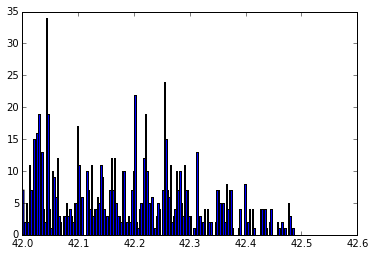

In [195]:
plt.figure()
junk = plt.hist(timestamps, 180, range=[42.0,42.5])

In [184]:
df = pd.DataFrame(dts)

In [187]:
xx = df.groupby([df.date.dt.year, df.date.dt.month, df.date.dt.day]).count()

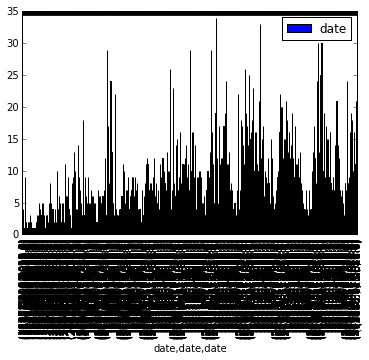

In [191]:
plt.figure()
xx.plot(kind="bar")

In [196]:
w_liveoak = (JJ['location'].str.contains("Live Oak Pi"))
print "Nticks in Live Oak", len(JJ[w_liveoak])
LO = JJ[w_liveoak]
hv_loc = LO['location']
uniq = LO_loc.unique()
s1=LO['date']

Nticks in Live Oak 98


NameError: name 'LO_loc' is not defined